## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

#Gathering data source 1
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)
    
df2 = pd.read_csv('image-predictions.tsv', sep='\t' )


In [ ]:
#consumer_key = Hidden
#consumer_secret = Hidden
#access_token = Hidden
#access_secret = Hidden

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
df = pd.read_csv('image-predictions.tsv', sep = '\t')
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2]:
#Gathering data source 2
with open('tweet_json.txt', 'r') as f:
    df = pd.read_json(f, lines=True)
    df = df[['id','favorite_count','retweet_count']]



In [3]:
#Gathering data source 3
df1 = pd.read_csv('twitter-archive-enhanced.csv')

## Assessing Data
### Visual Assessment

In [4]:
df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [5]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
#To organize this data, we will merge the three DF's on the tweet's id. 
#First I will rename id to tweet_id in order to merge on id
df = df.rename(columns={"id": "tweet_id"})
df_m = df.merge(df1,on='tweet_id').merge(df2,on='tweet_id')
df_merge =df_m.copy()
df_merge.head()

,tweet_id,favorite_count,retweet_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,39467,8853,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,33819,6514,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,25461,4328,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,42908,8964,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,41048,9774,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Programmatic Assessment

In [8]:
df.duplicated().sum()

0

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.duplicated().sum()

0

In [11]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
favorite_count                2073 non-null int64
retweet_count                 2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 no

In [12]:
df_merge['name'].value_counts() 

None            577
a                55
Charlie          11
Lucy             10
Tucker           10
Oliver           10
Cooper           10
Penny            10
Winston           8
Lola              8
Bo                8
Sadie             8
Daisy             7
an                7
the               7
Toby              7
Stanley           6
Milo              6
Rusty             6
Bella             6
Scout             6
Dave              6
Koda              6
Bailey            6
Jax               6
Alfie             5
Oscar             5
Chester           5
Larry             5
Leo               5
               ... 
Marlee            1
Pete              1
Winifred          1
Mojo              1
BeBe              1
Fwed              1
Chaz              1
Jarod             1
Beckham           1
Roscoe            1
Dixie             1
Flash             1
Lipton            1
Mosby             1
Sky               1
Jordy             1
Andy              1
Maks              1
Cleopatricia      1


In [13]:
print(df_merge['rating_denominator'].value_counts()) 
df_merge['rating_numerator'].value_counts()

10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64


12      473
10      429
11      413
13      283
9       151
8        95
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

## Issues Found (Quality and Tidiness)
### Quality Issue
>1) Remove non-null entries in retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id and retweeted_status_timestamp. <br>
>2) Drop columns: retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id and retweeted_status_timestamp. <br>
>3) There is inconsistency between lower and uppercase names for p1,p2,p3. Use lower to make all p1,  p2, p3 names lowercase. <br>
>4) Some dog types under p1, p2, p3 are not dog types so remove these rows by seeing if p1_dog, p2_dog and p3_dog are all True. <br>
>5) Drop columns: p1_dog, p2_dog and p3_dog <br>
>6) Convert Tweet_id columns from int to str. <br>
>7) Convert timestamp column from object to datetime. <br>
>8) Denominators do not add up to 10 so multiply the numerator by whatever you multiply the demoniator by to get 10. <br>
>9) Drop Rating Denominator column. <br>
>10) Replace None, an .etc with NaN under name that are not actual names. 

### Tidiness Issue
>1) Merge doggo, floofer, pupper, puppo into one column. <br>
>2) Merge all tables together (done above)


## Clean

In [14]:
#Issue 1 Define:
#Remove non-null entries in retweeted_status_id, retweeted_status_user_id,
#in_reply_to_status_id, in_reply_to_user_id and retweeted_status_timestamp

#Code
df_merge = df_merge[df_merge['in_reply_to_status_id'].isnull()]
df_merge = df_merge[df_merge['retweeted_status_id'].isnull()]
df_merge = df_merge[df_merge['retweeted_status_user_id'].isnull()]
df_merge = df_merge[df_merge['in_reply_to_user_id'].isnull()]
df_merge = df_merge[df_merge['retweeted_status_timestamp'].isnull()]

#Test
#you can see columns 123 and 129 are missing because they had nulls in the
#columns we were trying to weed out.
df_merge.head(125)

,tweet_id,favorite_count,retweet_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,39467,8853,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,33819,6514,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,25461,4328,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,42908,8964,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,41048,9774,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,20562,3261,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,12041,2158,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,56848,16716,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,28226,4429,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,32467,7711,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [15]:
#Issue 2 Define:
# Drop columns: retweeted_status_id, retweeted_status_user_id, in_reply_to
#_status_id, in_reply_to_user_id and retweeted_status_timestamp.

#Code
df_merge = df_merge.drop(['in_reply_to_status_id', 'retweeted_status_id','retweeted_status_user_id',
              'in_reply_to_user_id','retweeted_status_timestamp'], axis=1)

#Test
# You can see these columns were dropped because the column count is now 25.
df_merge.head(1)

,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,39467,8853,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [16]:
#Issue 3 Define:
#There is inconsistency between lower and uppercase names for p1,p2,p3. 
#Use lower to make all p1,  p2, p3 names lowercase.

#Code
df_merge["p1"] = df_merge["p1"].str.lower()
df_merge["p2"] = df_merge["p2"].str.lower()
df_merge["p3"] = df_merge["p3"].str.lower()

#Test
df_merge.head()


,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,39467,8853,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,33819,6514,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,25461,4328,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,42908,8964,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,41048,9774,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [17]:
#Issue 4 Define:
#Some dog types under p1, p2, p3 are not dog types so remove these rows.

#Code
df_merge = df_merge.query('p1_dog == True and p2_dog == True and p3_dog == True')
df_merge 

#Test

,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,33819,6514,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,25461,4328,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,41048,9774,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
7,890729181411237888,56848,16716,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,28226,4429,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,32467,7711,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
10,890006608113172480,31166,7624,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,1,samoyed,0.957979,True,pomeranian,0.013884,True,chow,0.008167,True
12,889665388333682689,38818,8538,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,...,1,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True
13,889638837579907072,27672,4735,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,...,1,french_bulldog,0.991650,True,boxer,0.002129,True,staffordshire_bullterrier,0.001498,True
14,889531135344209921,15359,2321,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,...,1,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True


In [18]:
#Issue 5 Define:
#Drop columns: p1_dog, p2_dog and p3_dog

#Code
df_merge = df_merge.drop(['p1_dog', 'p2_dog','p3_dog'], axis=1)

#Test
df_merge.head()

,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1,892177421306343426,33819,6514,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957
2,891815181378084864,25461,4328,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
4,891327558926688256,41048,9774,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219
7,890729181411237888,56848,16716,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507
8,890609185150312448,28226,4429,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184


In [19]:
#Issue 6 Define:
# Convert Tweet_id columns from int to str.

#Code
df_merge['tweet_id'] = df_merge['tweet_id'].apply(str)
df_merge.info()

#Test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 1 to 2072
Data columns (total 22 columns):
tweet_id              1194 non-null object
favorite_count        1194 non-null int64
retweet_count         1194 non-null int64
timestamp             1194 non-null object
source                1194 non-null object
text                  1194 non-null object
expanded_urls         1194 non-null object
rating_numerator      1194 non-null int64
rating_denominator    1194 non-null int64
name                  1194 non-null object
doggo                 1194 non-null object
floofer               1194 non-null object
pupper                1194 non-null object
puppo                 1194 non-null object
jpg_url               1194 non-null object
img_num               1194 non-null int64
p1                    1194 non-null object
p1_conf               1194 non-null float64
p2                    1194 non-null object
p2_conf               1194 non-null float64
p3                    1194 non-null 

In [20]:
#Issue 7 Define:
#Convert timestamp column from object to datetime.

#Code
df_merge['timestamp'] = pd.to_datetime(df_merge['timestamp'])

#Test
df_merge

,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,pupper,puppo,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1,892177421306343426,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957
2,891815181378084864,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
4,891327558926688256,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219
7,890729181411237888,56848,16716,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507
8,890609185150312448,28226,4429,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184
9,890240255349198849,32467,7711,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,None,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,cardigan,0.451038,chihuahua,0.029248
10,890006608113172480,31166,7624,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,...,None,None,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,samoyed,0.957979,pomeranian,0.013884,chow,0.008167
12,889665388333682689,38818,8538,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,...,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,cardigan,0.027356,basenji,0.004633
13,889638837579907072,27672,4735,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,...,None,None,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,french_bulldog,0.991650,boxer,0.002129,staffordshire_bullterrier,0.001498
14,889531135344209921,15359,2321,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,...,None,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,labrador_retriever,0.013834,redbone,0.007958


In [21]:
#Issue 8 Define:
#Denominators do not add up to 10 so multiply the numerator by whatever
#you multiply the demoniator by to get 10.

#Code
for i in range(len(df_merge['timestamp'])):
    num = df_merge['rating_numerator'] 
    dem = df_merge['rating_denominator']
    df_merge['rating_numerator'] = (10/dem)*num
    df_merge['rating_denominator'] = 10

#Test
print(df_merge['rating_denominator'].value_counts()) 
df_merge['rating_numerator'].value_counts()

10    1194
Name: rating_denominator, dtype: int64


12.000000    309
10.000000    257
11.000000    246
13.000000    177
9.000000      94
8.000000      50
14.000000     17
7.000000      15
5.000000      10
6.000000       8
4.000000       4
2.000000       2
34.285714      1
3.000000       1
27.000000      1
26.000000      1
8.181818       1
Name: rating_numerator, dtype: int64

In [22]:
#Issue 9 Define:
#Drop Rating Denominator column.

#Code
df_merge = df_merge.drop(['rating_denominator'], axis=1)

#Test
df_merge.head()

,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,...,pupper,puppo,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
1,892177421306343426,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,...,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957
2,891815181378084864,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,...,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
4,891327558926688256,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,...,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219
7,890729181411237888,56848,16716,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,None,None,...,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507
8,890609185150312448,28226,4429,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,None,...,None,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184


In [23]:
#Issue 10 Define:
#Replace None, an .etc with NaN under name that are not actual names. 

#Code
df_merge.name.replace(['None', 'a', 'an','the', 'not','actually','getting'
                       ,'incredibly','infuriating','just','light','my',
                       'officially','one','quite','very'],
                      np.NaN, inplace=True)

#Test
print(df_merge['name'].value_counts())
df_merge.sample(5)

Cooper       9
Charlie      8
Oliver       7
Sadie        6
Koda         6
Winston      5
Toby         5
Lucy         5
Tucker       5
Bo           5
Leo          5
Larry        4
Stanley      4
Maggie       4
Dave         4
Reggie       4
Scooter      4
Sophie       4
Daisy        4
Finn         4
Gus          4
Bear         4
Oscar        4
Brody        3
Dexter       3
Bentley      3
Olive        3
Jack         3
Winnie       3
Sammy        3
            ..
Chevy        1
Diogi        1
Lorelei      1
Maddie       1
Bobbay       1
Bonaparte    1
Dug          1
Alfy         1
Jesse        1
Jarvis       1
Link         1
Kona         1
Buddah       1
Ozzy         1
Coopson      1
Nigel        1
Fynn         1
Kawhi        1
Mac          1
Sprinkles    1
Klein        1
Toffee       1
Godi         1
Albert       1
Brandy       1
Buckley      1
Rumble       1
Rinna        1
Rory         1
Joey         1
Name: name, Length: 632, dtype: int64


,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,...,pupper,puppo,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
595,780601303617732608,13525,3839,2016-09-27 02:53:48,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,https://twitter.com/dog_rates/status/780601303...,12.0,Hercules,None,...,None,None,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,saint_bernard,0.995143,cardigan,0.003044,english_springer,0.001050
577,783391753726550016,18908,6441,2016-10-04 19:42:03,"<a href=""http://twitter.com/download/iphone"" r...",Meet Godi. He's an avid beachgoer and part tim...,https://twitter.com/dog_rates/status/783391753...,13.0,Godi,None,...,None,None,https://pbs.twimg.com/media/Ct8qn8EWIAAk9zP.jpg,4,norwegian_elkhound,0.877130,cairn,0.086241,keeshond,0.011019
1527,677314812125323265,1799,611,2015-12-17 02:30:09,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10.0,Tassy,None,...,None,None,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,blenheim_spaniel,0.924127,japanese_spaniel,0.054790,chihuahua,0.008204
1382,684195085588783105,2108,595,2016-01-05 02:09:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,https://twitter.com/dog_rates/status/684195085...,9.0,Tino,None,...,None,None,https://pbs.twimg.com/media/CX6_y6OU0AAl3v2.jpg,1,chihuahua,0.379365,toy_terrier,0.121809,boston_bull,0.095981
1157,701214700881756160,13475,5812,2016-02-21 01:19:47,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",https://twitter.com/dog_rates/status/701214700...,12.0,NaN,None,...,None,None,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,chihuahua,0.615163,pembroke,0.159509,basenji,0.084466


In [24]:
#Issue 11 Define:
#Merge doggo, floofer, pupper, puppo into one column.

#Code
df_merge.doggo.replace(['None', np.NaN], '', inplace=True)
df_merge.floofer.replace(['None', np.NaN], '', inplace=True)
df_merge.pupper.replace(['None', np.NaN], '', inplace=True)
df_merge.puppo.replace(['None', np.NaN], '', inplace=True)

df_merge['dog_stages'] = df_merge.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
df_merge['dog_stages'] = df_merge.doggo + df_merge.floofer + df_merge.pupper + df_merge.puppo

df_merge = df_merge.drop(['doggo', 'floofer','pupper','puppo'], axis=1)

#Test
print(df_merge['dog_stages'].value_counts())
df_merge.head(25)


                1005
pupper           119
doggo             39
puppo             18
floofer            6
doggopupper        5
doggofloofer       1
doggopuppo         1
Name: dog_stages, dtype: int64


,tweet_id,favorite_count,retweet_count,timestamp,source,text,expanded_urls,rating_numerator,name,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog_stages
1,892177421306343426,33819,6514,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,pekinese,0.090647,papillon,0.068957,
2,891815181378084864,25461,4328,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,
4,891327558926688256,41048,9774,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,english_springer,0.225770,german_short-haired_pointer,0.175219,
7,890729181411237888,56848,16716,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,pomeranian,0.566142,eskimo_dog,0.178406,pembroke,0.076507,
8,890609185150312448,28226,4429,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,irish_setter,0.193054,chesapeake_bay_retriever,0.118184,
9,890240255349198849,32467,7711,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,cardigan,0.451038,chihuahua,0.029248,doggo
10,890006608113172480,31166,7624,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,samoyed,0.957979,pomeranian,0.013884,chow,0.008167,
12,889665388333682689,38818,8538,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,NaN,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,cardigan,0.027356,basenji,0.004633,puppo
13,889638837579907072,27672,4735,2017-07-25 00:10:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,Ted,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,french_bulldog,0.991650,boxer,0.002129,staffordshire_bullterrier,0.001498,
14,889531135344209921,15359,2321,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,labrador_retriever,0.013834,redbone,0.007958,puppo


## Analysis

>1) What dog name gets the best rating on average? How about names that appear more than once?<br>
>2) At what stage does a dog get its best rating? <br>
>3) What is the distribution of name reusage?

In [25]:
#Question & Insight 1:
#What dog name gets the best rating on average?
df_merge.groupby('name')['rating_numerator'].mean().nlargest(5)

name
Sam        34.285714
Sophie     15.000000
Cermet     14.000000
Doobert    14.000000
Emmy       14.000000
Name: rating_numerator, dtype: float64

In [26]:
#Question & Insight 1 Cont.:
#How about names that appear more than once?
df_merge[df_merge.groupby('name')['name'].transform('size') > 1].groupby('name')['rating_numerator'].mean().nlargest(5)



name
Sophie     15.0
Gary       13.5
Clark      13.0
Paisley    13.0
Peaches    13.0
Name: rating_numerator, dtype: float64

In [27]:
#Question & Insight 2:
#At what stage does a dog get its best rating?
df_merge.groupby('dog_stages')['rating_numerator'].mean().sort_values(ascending=False)


dog_stages
doggopuppo      13.000000
doggopupper     12.200000
puppo           12.055556
doggo           12.051282
floofer         12.000000
pupper          11.159664
doggofloofer    11.000000
                10.864147
Name: rating_numerator, dtype: float64

1    505
2     79
3     25
4     12
5      6
6      2
9      1
8      1
7      1
Name: count, dtype: int64
632


Text(0,0.5,'Count')

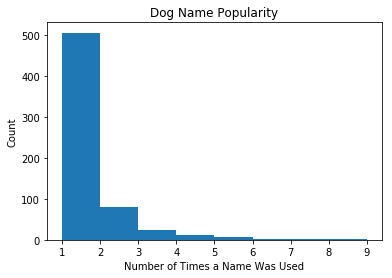

In [28]:
#Question & Insight 3:
#What is the distribution of name reusage?
name_count = df_merge['name'].value_counts()
name_count = name_count.to_frame().reset_index().rename(columns= {'index': 'name', 'name': 'count'})
name_count

print(name_count['count'].value_counts())
print(name_count['count'].count())
ax = name_count["count"].plot.hist(
bins = max(name_count["count"]) - min(name_count["count"]),
    title = 'Dog Name Popularity');
ax.set_xlabel("Number of Times a Name Was Used")
ax.set_ylabel("Count")




In [29]:
df.to_csv('wrangle_and_analyze_data.csv')